### Early Stopping

In [1]:
%load_ext tensorboard

In [5]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)


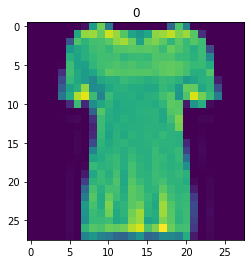

In [10]:
import matplotlib.pyplot as plt

print(X_train.shape)

plt.title(y_train[10])
plt.imshow(X_train[10]);

In [30]:
max_pixel_value = 255.
X_train, X_test = X_train / max_pixel_value, X_test / max_pixel_value
# X_train[0]

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten, Dense, ReLU
import tensorflow as tf
import os

In [42]:
# create 2 dir -- one for tensorboard results and one for early stopping
logdir = os.path.join('logs', 'EarlyStopping-Loss')

# instantiate a tensorboard cb obj
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
# instantiate a early stopping callback obj
stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

model = tf.keras.Sequential([
    # takes 2d image and flattens into row vector
    Flatten(input_shape=(28,28)),
    Dense(128), # hidden layer 1
    ReLU(negative_slope=0.01), # act func 1
    Dense(128), # hidden layer 2
    ReLU(negative_slope=0.01), # act func 2
    Dense(128), # hidden layer 3
    ReLU(negative_slope=0.01), # act func 3
    Dense(10, activation='softmax') # output layer, use softmax for classification of labels greater than 2
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, validation_data=(X_test,y_test),callbacks=[tensorboard_callback, stop])

Epoch 1/99
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3029 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/99
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/99
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3029 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/99
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000


In [60]:
# %tensorboard --logdir logs

In [61]:
# Double check ^^^^^ tensorboard

### Weight Decay

In [51]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [48]:
Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01))

In [56]:
logdir = os.path.join('logs', 'EarlyStopping+:2_WeightDecay')

tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    ReLU(negative_slope=.01),
    Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    ReLU(negative_slope=.01),
    Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    ReLU(negative_slope=.01),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, validation_data=(X_test, y_test), callbacks=[tensorboard_callback, stop])

Epoch 1/99
1875/1875 [==============================] - 34s 18ms/step - loss: 2.5177 - accuracy: 0.0978 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/99
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3030 - accuracy: 0.0970 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/99
1875/1875 [==============================] - 36s 19ms/step - loss: 2.3029 - accuracy: 0.1009 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 4/99
1875/1875 [==============================] - 39s 21ms/step - loss: 2.3030 - accuracy: 0.0994 - val_loss: 2.3031 - val_accuracy: 0.1000


In [57]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 512)               401920    
                                                                 
 re_lu_27 (ReLU)             (None, 512)               0         
                                                                 
 dense_40 (Dense)            (None, 512)               262656    
                                                                 
 re_lu_28 (ReLU)             (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 512)               262656    
                                                                 
 re_lu_29 (ReLU)             (None, 512)              

In [59]:
# %tensorboard --logdir logs

### Weight Constraint

In [62]:
tf.keras.constraints.MaxNorm(max_value=2, axis=0)

In [63]:
from tensorflow.keras.constraints import MaxNorm

In [66]:
wc = MaxNorm(max_value=2)

logdir = os.path.join('logs', 'EarlyStopping+WeightConstraint')

tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=0.01),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=0.01),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=0.01),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, validation_data=(X_test,y_test), callbacks=[tensorboard_callback, stop])

Epoch 1/99
1875/1875 [==============================] - 37s 19ms/step - loss: 2.3030 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/99
1875/1875 [==============================] - 36s 19ms/step - loss: 2.3029 - accuracy: 0.0987 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 3/99
1875/1875 [==============================] - 38s 20ms/step - loss: 2.3029 - accuracy: 0.0974 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/99
1875/1875 [==============================] - 37s 20ms/step - loss: 2.3029 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1000


### Dropouts

In [70]:
# %tensorboard --logdir logs

In [71]:
from tensorflow.keras.layers import Dropout

In [73]:
wc = MaxNorm(max_value=2)
logdir = os.path.join('logs', 'EarlyStopping+WeightConstraint+Dropout')
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=0.01),
    Dropout(.2),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=0.01),
    Dropout(.2),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=0.01),
    Dropout(.2),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, validation_data=(X_test,y_test), callbacks=[tensorboard_callback, stop])

Epoch 1/99
1875/1875 [==============================] - 38s 20ms/step - loss: 2.3031 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/99
1875/1875 [==============================] - 35s 18ms/step - loss: 2.3029 - accuracy: 0.0990 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/99
1875/1875 [==============================] - 36s 19ms/step - loss: 2.3030 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/99
1875/1875 [==============================] - 37s 19ms/step - loss: 2.3030 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.1000


In [77]:
# %tensorboard --logdir logs

### Save

In [78]:
cpoint = tf.keras.callbacks.ModelCheckpoint('weights_best.h5', verbose=1, save_weight_only=True)

def create_model():
    model = tf.keras.Sequential([
        Flatten(input_shape=(28,28)),
        Dense(128),
        ReLU(negative_slope=0.01),
        Dense(128),
        ReLU(negative_slope=0.01),
        Dense(128),
        ReLU(negative_slope=0.01),
        Dense(10, activation='softmax')
    ])
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
    
    return model

model = create_model()
model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test), verbose=2, callbacks=[cpoint])

Epoch 1/2

Epoch 00001: saving model to weights_best.h5
1875/1875 - 6s - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000 - 6s/epoch - 3ms/step
Epoch 2/2

Epoch 00002: saving model to weights_best.h5
1875/1875 - 6s - loss: 2.3029 - accuracy: 0.0996 - val_loss: 2.3028 - val_accuracy: 0.1000 - 6s/epoch - 3ms/step


In [79]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 710us/step - loss: 2.3028 - accuracy: 0.1000


[2.302774667739868, 0.10000000149011612]

In [80]:
m = create_model()
m.load_weights('./weights_best.h5')
m.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_58 (Dense)            (None, 128)               100480    
                                                                 
 re_lu_42 (ReLU)             (None, 128)               0         
                                                                 
 dense_59 (Dense)            (None, 128)               16512     
                                                                 
 re_lu_43 (ReLU)             (None, 128)               0         
                                                                 
 dense_60 (Dense)            (None, 128)               16512     
                                                                 
 re_lu_44 (ReLU)             (None, 128)             

In [81]:
m.evaluate(X_test,y_test)

313/313 [==============================] - 0s 704us/step - loss: 2.3028 - accuracy: 0.1000


[2.302774667739868, 0.10000000149011612]

### Save Entire Model

In [82]:
# create and train a new model instance
model = create_model()
model.fit(X_train, y_train, epochs=5)

# save the entire model as a saved model
!mkdir -p saved_model
model.save('saved_model/my_model')

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3029 - accuracy: 0.0989
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0996
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992


2021-12-08 03:59:42.443500: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/my_model/assets


#### Load Fresh Model

In [83]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# check architecture
new_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_62 (Dense)            (None, 128)               100480    
                                                                 
 re_lu_45 (ReLU)             (None, 128)               0         
                                                                 
 dense_63 (Dense)            (None, 128)               16512     
                                                                 
 re_lu_46 (ReLU)             (None, 128)               0         
                                                                 
 dense_64 (Dense)            (None, 128)               16512     
                                                                 
 re_lu_47 (ReLU)             (None, 128)             

In [84]:
new_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 827us/step - loss: 2.3027 - accuracy: 0.1000


[2.3027076721191406, 0.10000000149011612]